Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.

## 12. Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.

In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# In the notebooks on Pandas, Matplotlib and Scaling
#   04 - Beginning Pandas <br>
#   05 - Beginning Matplotlib <br>
#   06 - Beginning Data Scaling <br>
# we loaded our dataset such as
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [3]:
# Drop the port column
df_conn = df_conn.drop(columns=['id.resp_p'], inplace=False)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,0.000000,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [4]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# I know you might be saying, why didn't we fix these earlier. 
# Good question, we are learning (pun intended) as we go along
# Besides you learn more about your data as you work with your data.
# Or as it is said, if you interrogate the data long enough, it will confess
#   https://quoteinvestigator.com/2021/01/18/confess/
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) 
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  
                               & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) 
                               & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
7,0.054294,208,977,6,528,6,1297,0
8,0.424980,227,791633,176,9387,174,367737,0
9,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [5]:
# Interesting, after removing those records where the rows had all 0s, our dataset is now 207,457 records
# Keep in mind the original normal dataset was over 4.4 million records.
# This is a good reduction of useless records
# Saving the dataframe
df_conn.to_csv(path_or_buf='./conn-reduced.csv',  sep=',')

# Validate the file was there
!dir conn-reduced.* /b

conn-reduced.csv


In [6]:
# As always analyze our data before looking into any Machine or in this case Deep Learning algorithms
# Extract all the records where the labels are 0 and mark those as normal
# These will be used to train our autoencoder
df_normal = df_conn[df_conn.label == 0]
df_normal_labels = df_conn[df_conn.label == 0].values[:, -1]
df_normal = df_normal.drop(columns=['label'], inplace=False)
df_normal

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


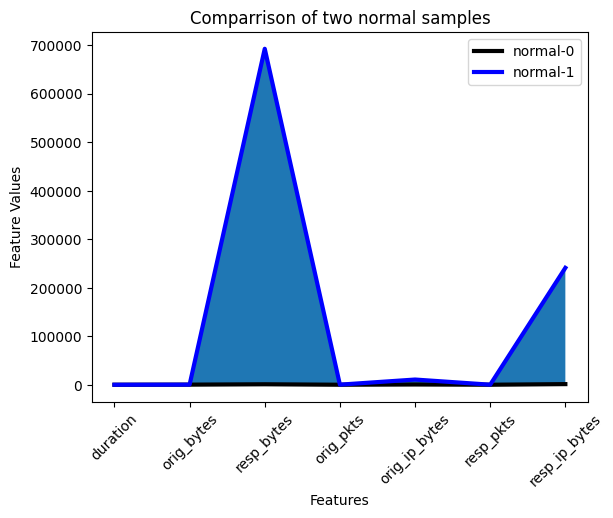

In [7]:
# Plotting two of the normal sample data points, to see what the data looks like
plt.title('Comparrison of two normal samples')
plt.plot(df_normal.values[0, : ], label='normal-0', c='black', lw=3)
plt.plot(df_normal.values[1, : ], label='normal-1', c='b', lw=3)
plt.fill_between(x=np.arange(start=0,stop=7, step=1), y1=df_normal.values[0, : ], y2=df_normal.values[1, : ] )
plt.xlabel(xlabel='Features')
plt.xticks(np.arange(start=0, stop=7, step=1), ['duration', 'orig_bytes', 'resp_bytes', 
                                                'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'], rotation=45)
plt.ylabel(ylabel='Feature Values')
plt.legend(loc='best')
plt.show()

In [8]:
# With an understanding of what the first two normal data points looks like
# Extract all the records where the labels are 1 and mark those as suspicious
# These will be used to understand our autoencoder performance against suspicious traffic
# The expectation is the autonencoder will have a higher reconstruction error for those suspicious records
df_suspicious = df_conn[df_conn.label == 1 ]
df_suspicious = df_suspicious.drop(columns=['label'], inplace=False)
df_suspicious

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5982,5.932275,15759454,645,7798,11593818,10588,428317
51574,107.685110,1567276,0,14,133416,0,0
55611,217.387880,3213967,0,6,58430,0,0
115226,130.989500,2480118,362609,50,1595225,10,197593
115972,141.094380,3561386,1107090,60,3026679,33,982584
...,...,...,...,...,...,...,...
4032886,264.840360,1207114,451720,1,52,11,373114
4052768,7110.420400,1124942,16527,1873,1251154,1695,112731
4070183,1079.268100,1767062,0,52,1586878,0,0
4192109,213.562450,1107362,186663,1,52,5,159831


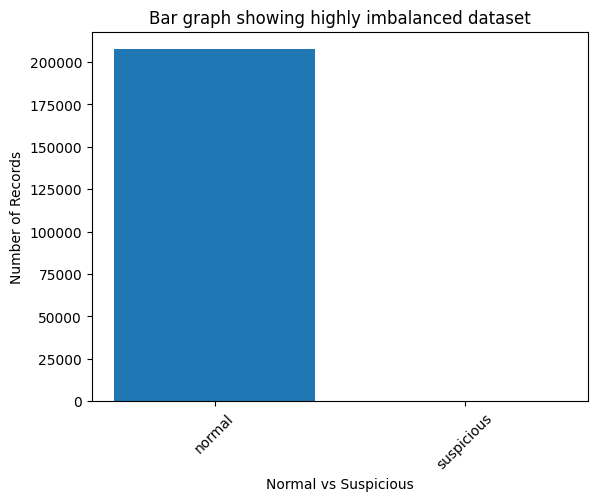

In [9]:
# The graph below shows this dataset is highly imbalanced.
# There is a significant disparity in the number of records labeled 0 vs 1
# As a result, using measures like accuracy is more than likely not the best approach, 
# to understand how well our eventual model has "learned" via the training data
plt.title('Bar graph showing highly imbalanced dataset')
plt.bar(x=['normal', 'suspicious'], height=[df_normal.shape[0], df_suspicious.shape[0]])
plt.ylabel(ylabel='Number of Records')
plt.xlabel(xlabel='Normal vs Suspicious')
plt.xticks(rotation=45)
plt.show()


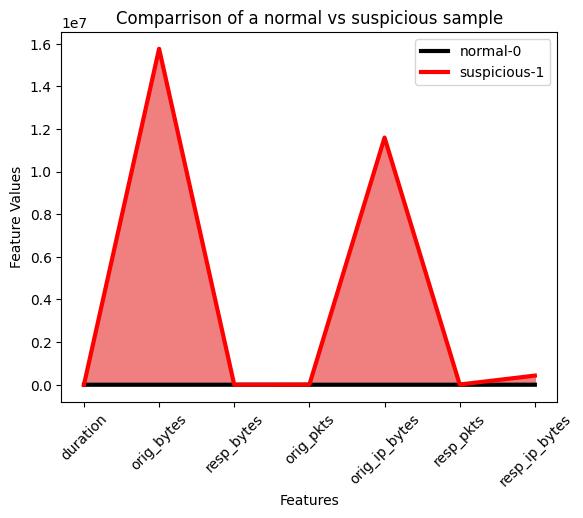

In [10]:
# Plotting a normal vs a suspicious sample
plt.title('Comparrison of a normal vs suspicious sample')
plt.plot(df_normal.values[0, : ], label='normal-0', c='black', lw=3)
plt.plot(df_suspicious.values[0, : ], label='suspicious-1', c='r', lw=3)
plt.fill_between(x=np.arange(start=0,stop=7, step=1), y1=df_normal.values[0, : ], 
                 y2=df_suspicious.values[0, : ], color='lightcoral')
plt.xlabel(xlabel='Features')
plt.xticks(np.arange(start=0, stop=7, step=1), ['duration', 'orig_bytes', 'resp_bytes', 
                                                'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'], \
                                                    rotation=45)
plt.ylabel(ylabel='Feature Values')
plt.legend(loc='best')

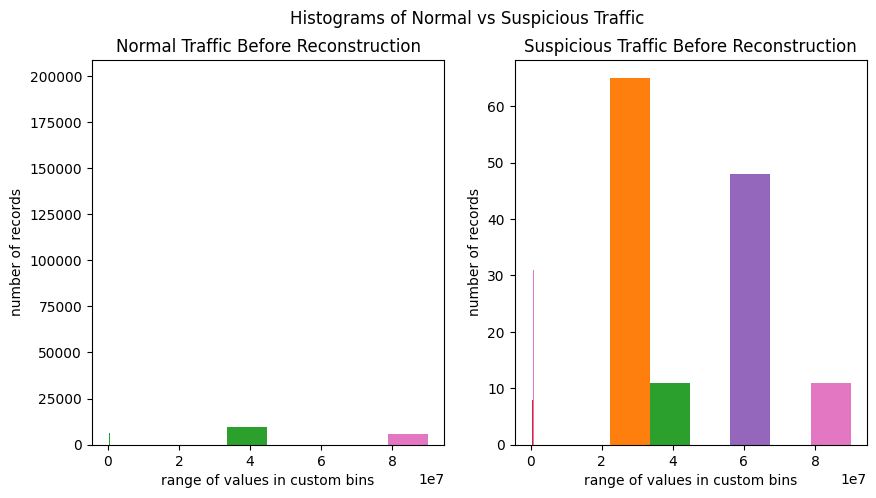

In [11]:
# What do we conclude from the normal vs suspicious activity?
# Duration, orig_bytes, orig_pkts, orig_ip_bytes all seems to be higher for the suspicious sample
# Comparing a histogram of the data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=False)

plt.suptitle('Histograms of Normal vs Suspicious Traffic')
ax[0].set_title('Normal Traffic Before Reconstruction')
ax[0].hist(df_normal, bins=[0, 1e2, 1e4, 1e6, 1e8])
ax[0].set_ylabel(ylabel='number of records')
ax[0].set_xlabel(xlabel='range of values in custom bins')

ax[1].set_title('Suspicious Traffic Before Reconstruction')
ax[1].hist(df_suspicious, bins=[0, 1e2, 1e4, 1e6, 1e8])
ax[1].set_ylabel(ylabel='number of records')
ax[1].set_xlabel(xlabel='range of values in custom bins')
plt.show()


In [12]:
# Definitely, there is a visible difference between the normal and suspicious traffic histogram
# Let's get some descriptive statistics on the two datasets
# Starting with the normal traffic
pd.options.display.float_format = '{:.2f}'.format
df_normal.describe()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,207541.00,207541.00,207541.00,207541.00,207541.00,207541.00,207541.00
mean,16.95,7808.70,297803.78,34.43,3785.39,48.06,75245.35
std,185.87,1736337.54,15063355.55,827.46,496005.80,1862.29,2314347.77
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.00,52.00,1.00,40.00
50%,0.00,0.00,0.00,1.00,63.00,1.00,40.00
75%,0.09,217.00,154.00,6.00,617.00,3.00,201.00
max,33306.40,576842469.00,2098063527.00,274670.00,225262843.00,571383.00,578874775.00


In [13]:
# Getting the statistics from the perspective of the suspicious data
df_suspicious.describe()

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,67.00,67.00,67.00,67.00,67.00,67.00,67.00
mean,1712.73,38853235.15,3773473.87,12227.63,9673253.01,10958.85,4018232.07
std,2294.16,233948577.17,18684552.16,58719.48,51883222.08,41803.18,19493395.37
min,0.31,1015672.00,0.00,1.00,52.00,0.00,0.00
25%,213.66,1525013.50,0.00,58.00,653074.00,0.00,0.00
50%,1032.38,2412002.00,31183.00,381.00,1705839.00,816.00,140614.00
75%,3214.22,4190262.50,407164.50,4370.50,3203131.50,5137.00,593585.00
max,15758.69,1882412858.00,146981213.00,476032.00,423975367.00,332692.00,153474622.00


In [14]:
# We can see above, generally, the values in the suspicious records have larger values
# With a statistical understanding of the normal and suspicious datasets, time to build the model
# Scaling the data first using MinMax Scaler
# import the scaler library
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the normal data
min_max_scaler.fit(df_normal.values)

# Transform the normal data
df_normal = min_max_scaler.transform(df_normal.values)
df_normal

array([[1.59957245e-06, 3.60583714e-07, 4.65190871e-07, ...,
        2.34392851e-06, 1.05008374e-05, 2.23882618e-06],
       [1.15186871e-05, 3.93521650e-07, 3.30003830e-04, ...,
        4.76731975e-05, 2.04766330e-04, 4.16140088e-04],
       [1.63013715e-06, 3.60583714e-07, 4.65667501e-07, ...,
        2.34392851e-06, 1.05008374e-05, 2.24055367e-06],
       ...,
       [1.50121298e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.75013957e-06, 6.90995734e-08],
       [1.50121298e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.75013957e-06, 6.90995734e-08],
       [1.50121298e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.75013957e-06, 6.90995734e-08]])

In [16]:
# Transform the suspicious data
# Remember, we fitted on the train normal values
# but we transform both the normal and suspicious values
#   06 - Beginning Data Scaling
df_suspicious = min_max_scaler.transform(df_suspicious.values)
df_suspicious

array([[1.78112165e-04, 2.73202041e-02, 3.07426344e-07, 2.83904322e-02,
        5.14679556e-02, 1.85304778e-02, 7.39913049e-04],
       [3.23316570e-03, 2.71699135e-03, 0.00000000e+00, 5.09702552e-05,
        5.92268118e-04, 0.00000000e+00, 0.00000000e+00],
       [6.52691014e-03, 5.57165461e-03, 0.00000000e+00, 2.18443951e-05,
        2.59385877e-04, 0.00000000e+00, 0.00000000e+00],
       [3.93286275e-03, 4.29947192e-03, 1.72830324e-04, 1.82036626e-04,
        7.08161621e-03, 1.75013957e-05, 3.41339800e-04],
       [4.23625429e-03, 6.17393169e-03, 5.27672297e-04, 2.18443951e-04,
        1.34362106e-02, 5.77546059e-05, 1.69740338e-03],
       [4.48919457e-04, 7.21331598e-03, 9.72992464e-05, 3.71354717e-04,
        1.78264242e-02, 1.05008374e-05, 3.05091891e-04],
       [2.88119130e-04, 2.07399431e-03, 4.51082623e-06, 9.32027524e-04,
        1.41751740e-03, 7.68311273e-04, 5.58393653e-05],
       [8.94245460e-02, 7.89351035e-03, 0.00000000e+00, 5.06061820e-04,
        1.84666630e-02, 0

In this notebook, I'm using model subclassing as in other notebook, I use the Sequential model <br>
&emsp;&emsp;    14 - Beginning Deep Learning, - Linear Regression, Tensorflow <br>
&emsp;&emsp;    16 - Beginning Deep Learning, - Classification, Tensorflow <br>
&emsp;&emsp;    19 - Beginning Deep Learning, - Convolution Networks - Tensorflow <br>

While in another the Functional model <br>
&emsp;&emsp;    18 - Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow <br> 


In [17]:
# Import tensorflow
import tensorflow as tf

In [18]:
# Setup the class
class AnomalyDetection(tf.keras.Model):
    ''' Using model subclassing to build the autoencoder'''
    def __init__(self):
        ''' Setups the constructor '''
        super(AnomalyDetection, self).__init__()
        
        # Setup the encoder
        # This compresses the input into it's latent representation
        self.encoder =  tf.keras.Sequential([ 
                        # Initialize the bias and weights to 0
                        # This is just to aid with predictability of this notebook output
                        tf.keras.layers.Dense(units=4, activation='relu', name='encoder_hidden_1', 
                                              use_bias=True, bias_initializer='zeros',
                                              kernel_initializer='zeros'),
                        tf.keras.layers.Dense(units=2, activation='relu', name='latent_space_bottleneck' )], name='encoder' )
        
        # Setup the decoder
        # This takes the two units in the latent space and reconstructs the data into the output layer
        # Keep in mind the output is a lossy reconstruction of the original input
        # https://www.adobe.com/uk/creativecloud/photography/discover/lossy-vs-lossless.html
        # Lossy meaning we should not expect the input to be an exact match of the output
        # Notice the output layer is sigmoid. Considering I scaled the input data above between 0 and 1
        # having sigmoid produce values between 0 and1 for the output makes sense
        self.decoder =  tf.keras.Sequential([  
                        tf.keras.layers.Dense(units=4, activation='relu', name='decoder_hidden_1' ), 
                        tf.keras.layers.Dense(units=df_normal.shape[1], activation='sigmoid',
                                               name='reconstructed_output')], name='decoder')
        
    def call(self, x):
        ''' Encode and decode the data '''
        encoded_data = self.encoder(x)
        decoded_data = self.decoder(encoded_data)
        return decoded_data
    
    def build_graph(self, input_shape):
        ''' This is so I can plot the graph model 
            https://stackoverflow.com/questions/76265221/retrieving-keras-layer-properties-from-a-tf-keras-model/76265933#76265933
        '''
        x = tf.keras.Input(shape=input_shape)
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [19]:
# Instantiate the class
autoencoder = AnomalyDetection()
autoencoder

In [20]:
# Compile the model using the Adam optimizer and Mean Absolute Error (MAE) loss function and a learning_rate of 0.01
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                    loss=tf.keras.losses.mae, metrics=['accuracy'])

In [21]:
# Time to train the autoencoder, using the normal data
# Notice both the input and output are the same
# Meaning, we are attempting to predict the same thing as our input
# Train for 10 epochs. How do I know 10 is the right number? I don't
# looking at the loss and accuracy below, it seems, 4 epochs is all that is needed for this model
# There is no significant improvement in the loss or accuracy after 4 epochs
# Early stopping callback might have also helped here
history = autoencoder.fit(x=df_normal, y=df_normal, epochs=10, validation_split=0.2, shuffle=False, batch_size=32)

Epoch 1/10
5189/5189 [==============================] - 15s 3ms/step - loss: 0.0207 - accuracy: 0.1615 - val_loss: 5.5682e-04 - val_accuracy: 0.1416
Epoch 2/10
5189/5189 [==============================] - 13s 2ms/step - loss: 2.9797e-04 - accuracy: 0.1615 - val_loss: 1.3714e-04 - val_accuracy: 0.1416
Epoch 3/10
5189/5189 [==============================] - 14s 3ms/step - loss: 1.6275e-04 - accuracy: 0.4766 - val_loss: 1.1148e-04 - val_accuracy: 0.8340
Epoch 4/10
5189/5189 [==============================] - 14s 3ms/step - loss: 1.5444e-04 - accuracy: 0.7815 - val_loss: 1.0982e-04 - val_accuracy: 0.8340
Epoch 5/10
5189/5189 [==============================] - 13s 3ms/step - loss: 1.5396e-04 - accuracy: 0.7815 - val_loss: 1.0973e-04 - val_accuracy: 0.8340
Epoch 6/10
5189/5189 [==============================] - 18s 3ms/step - loss: 1.5393e-04 - accuracy: 0.7815 - val_loss: 1.0973e-04 - val_accuracy: 0.8340
Epoch 7/10
5189/5189 [==============================] - 16s 3ms/step - loss: 1.5393e-0

In [22]:
# Get the model summary
autoencoder.summary(expand_nested=True, )

Model: "anomaly_detection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 2)                 42        
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| encoder_hidden_1 (Dense)  (None, 4)                 32        |
|                                                               |
| latent_space_bottleneck (De  (None, 2)              10        |
| nse)                                                          |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 decoder (Sequential)        (None, 7)                 47        
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| decoder_hidden_1 (Dense)  (None, 4)                 12        |
|                                                               |
| reconstructed_output (Dense  (None, 7)              35        |
| )                                              

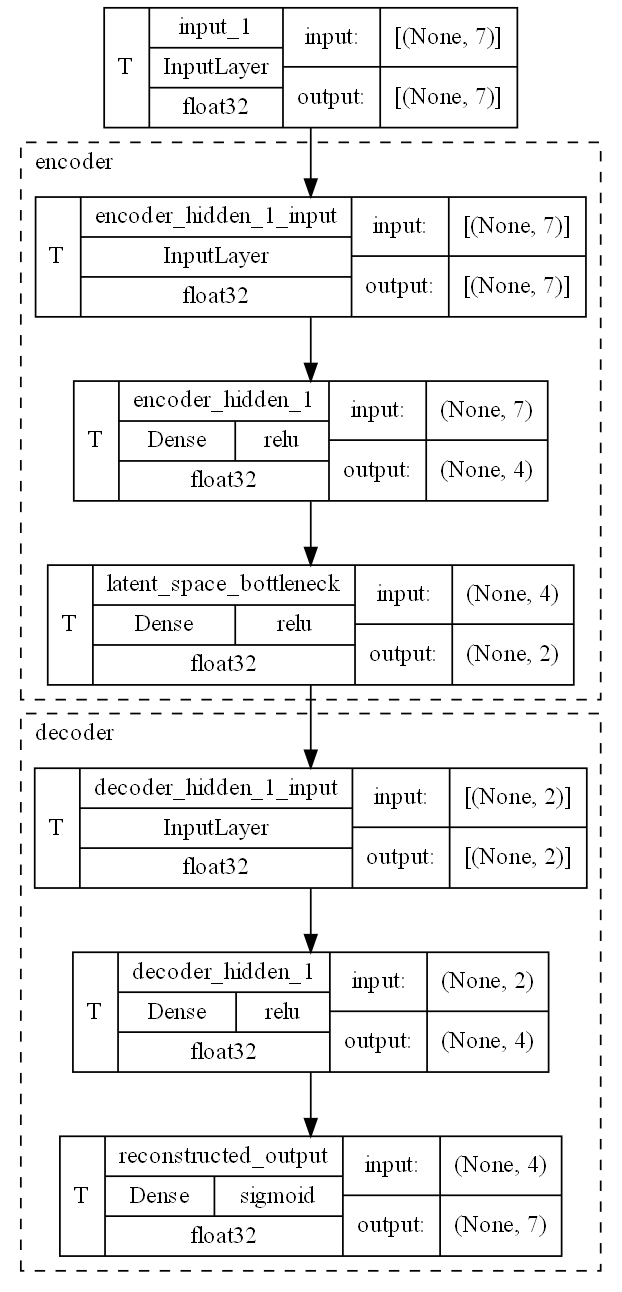

In [23]:
# Build a graph of the autoencoder model
tf.keras.utils.plot_model(model=autoencoder.build_graph(input_shape=df_normal.shape[1]), \
                          expand_nested=True, show_dtype=True, show_layer_activations=True, \
                            show_layer_names=True, show_shapes=True, show_trainable=True, dpi=125)

In [28]:
# Get the model weights
autoencoder.weights

[<tf.Variable 'encoder_hidden_1/kernel:0' shape=(7, 4) dtype=float32, numpy=
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32)>,
 <tf.Variable 'encoder_hidden_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'latent_space_bottleneck/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[-0.098423  , -0.73258996],
        [ 0.8762195 ,  0.71772814],
        [ 0.71949697, -0.42552352],
        [ 0.26922965,  0.28370547]], dtype=float32)>,
 <tf.Variable 'latent_space_bottleneck/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'decoder_hidden_1/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.1003201 , -0.96821547,  0.09043646, -0.55945015],
        [ 0.74960566, -0.20537567, -0.80979466,  0.03299522]],
       dtype=float32)>,
 <tf.Variable 'decoder_hid

In [25]:
# Get the compilation configuration
autoencoder.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': False,
   'is_legacy_optimizer': False,
   'learning_rate': 0.009999999776482582,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': {'module': 'keras.losses',
  'class_name': 'function',
  'config': 'mean_absolute_error',
  'registered_name': 'mean_absolute_error'},
 'metrics': ['accuracy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

In [26]:
# Get the metrics result
autoencoder.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.00010972827>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.834036>}

In [29]:
# How did our algorithm perform
print(history.history)

{'loss': [0.020693428814411163, 0.00029797045863233507, 0.00016275203961413354, 0.00015444053860846907, 0.00015395683294627815, 0.00015393410285469145, 0.00015393338981084526, 0.00015393283683806658, 0.00015393301146104932, 0.0001539330987725407], 'accuracy': [0.16151103377342224, 0.16151103377342224, 0.47655874490737915, 0.7814517617225647, 0.7814517617225647, 0.7814517617225647, 0.7814517617225647, 0.7814517617225647, 0.7814517617225647, 0.7814517617225647], 'val_loss': [0.0005568150663748384, 0.00013713634689338505, 0.00011147782788611948, 0.00010981740342685953, 0.00010973498137900606, 0.00010973122698487714, 0.00010972948803100735, 0.00010972839663736522, 0.00010972880409099162, 0.00010972827294608578], 'val_accuracy': [0.1415596604347229, 0.1415596604347229, 0.8340359926223755, 0.8340359926223755, 0.8340359926223755, 0.8340359926223755, 0.8340359926223755, 0.8340359926223755, 0.8340359926223755, 0.8340359926223755]}


In [30]:
# A cleaner view of the metrics
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.02,0.16,0.00,0.14
1,0.00,0.16,0.00,0.14
2,0.00,0.48,0.00,0.83
3,0.00,0.78,0.00,0.83
4,0.00,0.78,0.00,0.83
5,0.00,0.78,0.00,0.83
6,0.00,0.78,0.00,0.83
7,0.00,0.78,0.00,0.83
8,0.00,0.78,0.00,0.83
9,0.00,0.78,0.00,0.83


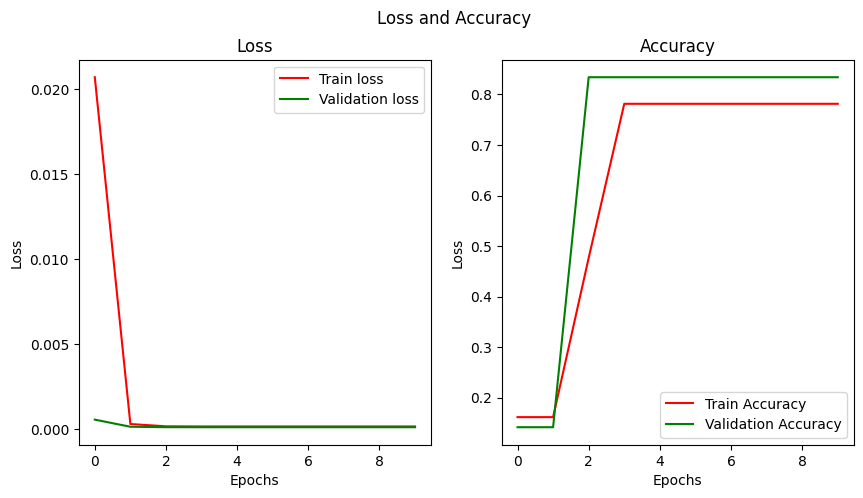

In [31]:
# Plot the training & validation loss and accuracy
#   05 - Beginning Matplotlib
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# We can see from below the loss has decreased while the accuracy has increased.
# More importantly, the graphs confirm that 4 epochs is probably enough 
# for this algorithm, based on the learning rate we choose
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
plt.suptitle('Loss and Accuracy')

ax[0].plot(history.history['loss'], 'r', history.history['val_loss'], 'g' )
ax[0].set_title('Loss')
ax[0].legend(labels=['Train loss', 'Validation loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(history.history['accuracy'], 'r', history.history['val_accuracy'], 'g' )
ax[1].set_title('Accuracy')
ax[1].legend(labels=['Train Accuracy', 'Validation Accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [32]:
# The encoded data is now down from its original 7 features to now 2. 
# This represents the bottleneck/latent space. Also represented by "z"
# Also called the latent space
normal_encoded_data = autoencoder.encoder(df_normal).numpy()
normal_encoded_data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [33]:
# Get the shape of this latent space
# We see we have the same number of samples as the training data but now 2 dimensions rather than the original 7
normal_encoded_data.shape, df_normal.shape

((207541, 2), (207541, 7))

In the notebook on PCA - <br>
&emsp; &emsp;   07 - Beginning Principal Component Analysis (PCA) <br>
We did dimensionality reduction. Think of above as the same, as we moved from 7 dimensions to 2, <br>
the main difference is in this autoencoder approach, we are using non-linear transformation.  <br>
Normal linear equation is f(x) = wx+b <br>

Our non-linear transformation is f(x) = relu(wx+b) <br>
By applying the activation function to wx+b, the result is made non-linear <br>

In [34]:
# Reconstructing the data from the encoded data
np.set_printoptions(suppress=True)
normal_decoded_data = autoencoder.decoder(normal_encoded_data).numpy()
normal_decoded_data

array([[0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       ...,
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013]], dtype=float32)

In [35]:
# Get the shape of the decoded data
# We can see, we now have the same number of records and dimensions from the decoded data
normal_decoded_data.shape, df_normal.shape

((207541, 7), (207541, 7))

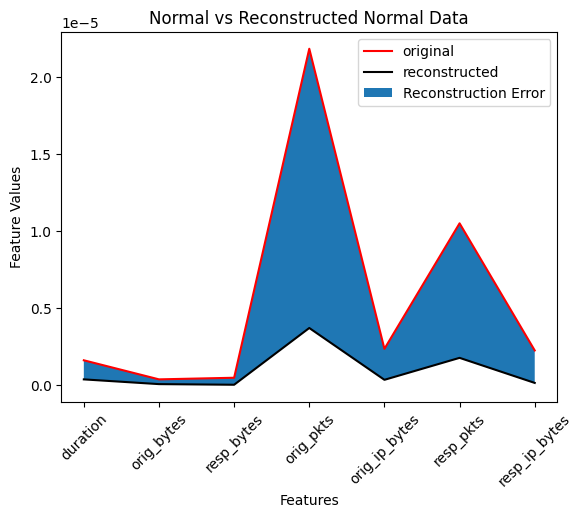

In [36]:
# Getting the reconstructing error by comparing the normal data with reconstructed normal data
plt.title('Normal vs Reconstructed Normal Data')
plt.plot(df_normal[0, : ], 'r', normal_decoded_data[0, : ], 'k')
plt.fill_between(np.arange(start=0, stop=7, step=1), df_normal[0, : ],normal_decoded_data[0, : ])
plt.xlabel('Features')
plt.xticks(np.arange(start=0, stop=7, step=1), ['duration', 'orig_bytes', 'resp_bytes', 
                                                'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'], rotation=45)
plt.ylabel(ylabel='Feature Values')
plt.legend(labels=['original', 'reconstructed', 'Reconstruction Error'])
plt.show()

In [37]:
# Encode the suspicious data
suspicious_encoded_data = autoencoder.encoder(df_suspicious)

# Get a view of the latent space
suspicious_encoded_data

<tf.Tensor: shape=(67, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],

In [38]:
# Decode the encoded suspicious data 
np.set_printoptions(suppress=True)
suspicious_decoded_data = autoencoder.decoder(suspicious_encoded_data)
suspicious_decoded_data

<tf.Tensor: shape=(67, 7), dtype=float32, numpy=
array([[0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001, 0.0000037 , 0.00000033,
        0.00000176, 0.00000013],
       [0.00000036, 0.00000005, 0.00000001

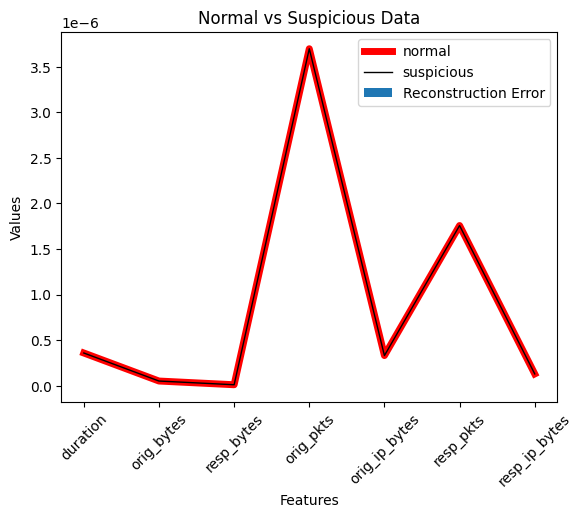

In [39]:
# Plot the reconstructing error of the normal decoded data with reconstructed suspicious data.
# It does not look like there is any real difference between the two from this view
# Maybe there is a better sample for us to use. 
# Or maybe we need to keep in mind, this is the scaled data and 
# we should expect all values to be between 0 and 1
plt.title('Normal vs Suspicious Data')
plt.plot(normal_decoded_data[5, : ], 'r', lw=5)
plt.plot(suspicious_decoded_data[5, : ], 'k', lw=1)
plt.fill_between(np.arange(start=0, stop=7, step=1), normal_decoded_data[0, : ], suspicious_decoded_data[0, : ])
plt.ylabel('Values')
plt.xlabel('Features')
plt.xticks(np.arange(start=0, stop=7, step=1), ['duration', 'orig_bytes', 
                                                'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 
                                                'resp_pkts', 'resp_ip_bytes'], rotation=45)
plt.legend(labels=['normal', 'suspicious', 'Reconstruction Error'])
plt.show()

In [40]:
# Looking at the entire dataset to see what the errors look like
# Note I'm excluding the labels
# First store the predictions
predictions = autoencoder.predict(df_conn.drop(columns=['label'], inplace=False))
predictions

6488/6488 [==============================] - 9s 1ms/step


array([[0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       ...,
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013],
       [0.00000036, 0.00000005, 0.00000001, ..., 0.00000033, 0.00000176,
        0.00000013]], dtype=float32)

In [41]:
# Getting the MAE Error of the entire dataset
errors_mae = tf.keras.losses.mae(y_pred=predictions, y_true=df_conn.drop(columns=['label'], inplace=False))
errors_mae

<tf.Tensor: shape=(207608,), dtype=float32, numpy=
array([   431.4362  , 134935.34    ,    431.72202 , ...,      5.857144,
            5.857144,      5.857144], dtype=float32)>

In [43]:
# Turn off scientific notation for the dataframe
pd.set_option.float_format = '{:.2f}'.format

# Let's now create a dataframe consisting of the reconstruction error and the labels
# The idea is to see how the errors look for anomalies vs normal data from the perspective of th labels
df_errors = pd.DataFrame({'errors_mae':errors_mae, 'label': df_conn.label})
df_errors

,errors_mae,label
5,431.44,0
6,134935.34,0
7,431.72,0
8,167047.78,0
9,83734.61,0
...,...,...
4430183,13.43,0
4430184,5.86,0
4430185,5.86,0
4430186,5.86,0


In [44]:
# Create a new dataframe of the reconstruction error of the normal samples
df_normal_reconstructed = df_errors[df_errors.label == 0]
df_normal_reconstructed

,errors_mae,label
5,431.44,0
6,134935.34,0
7,431.72,0
8,167047.78,0
9,83734.61,0
...,...,...
4430183,13.43,0
4430184,5.86,0
4430185,5.86,0
4430186,5.86,0


In [45]:
# Create a new dataframe of the reconstruction error of the suspicious samples
df_suspicious_reconstructed = df_errors[df_errors.label == 1]
df_suspicious_reconstructed

,errors_mae,label
5982,3971518.00,1
51574,242973.38,1
55611,467517.22,1
115226,662248.00,1
115972,1239710.38,1
...,...,...
4032886,290325.28,1
4052768,359433.22,1
4070183,479295.91,1
4192109,207732.50,1


In [46]:
# Describe the suspicious data
df_suspicious_reconstructed.describe()

,errors_mae,label
count,67.00,67.00
mean,8049012.50,1.00
std,37969652.00,0.00
min,207732.50,1.00
25%,372843.50,1.00
50%,662248.00,1.00
75%,1252358.12,1.00
max,268924736.00,1.00


In [47]:
# Get the statistics on the normal reconstructed data
df_normal_reconstructed.describe()

,errors_mae,label
count,207541.00,207541.00
mean,54963.24,0.00
std,2345637.25,0.00
min,4.14,0.00
25%,13.43,0.00
50%,23.15,0.00
75%,217.58,0.00
max,334820192.00,0.00


In [48]:
# We can see clearly from above, the reconstruction errors for the suspicious traffic is 
# significantly higher when compared to the normal traffic

In [49]:
# Find the index location of that record where the highest value exists in the suspicious dataframe
np.where(df_suspicious_reconstructed.values == df_suspicious_reconstructed.values.max())

(array([47], dtype=int64), array([0], dtype=int64))

In [50]:
# Get the value of the record at that index position
df_suspicious[47]

array([0.00000919, 3.2633049 , 0.00001486, 0.00003641, 0.00000468,
       0.00005425, 0.00004846])

In [51]:
# Keep in mind though, above represents the previous scaled data
# Inverting the scaling process
min_max_scaler.inverse_transform(df_suspicious[47].reshape(1, -1))

array([[3.06014000e-01, 1.88241286e+09, 3.11830000e+04, 1.00000000e+01,
        1.05500000e+03, 3.10000000e+01, 2.80510000e+04]])

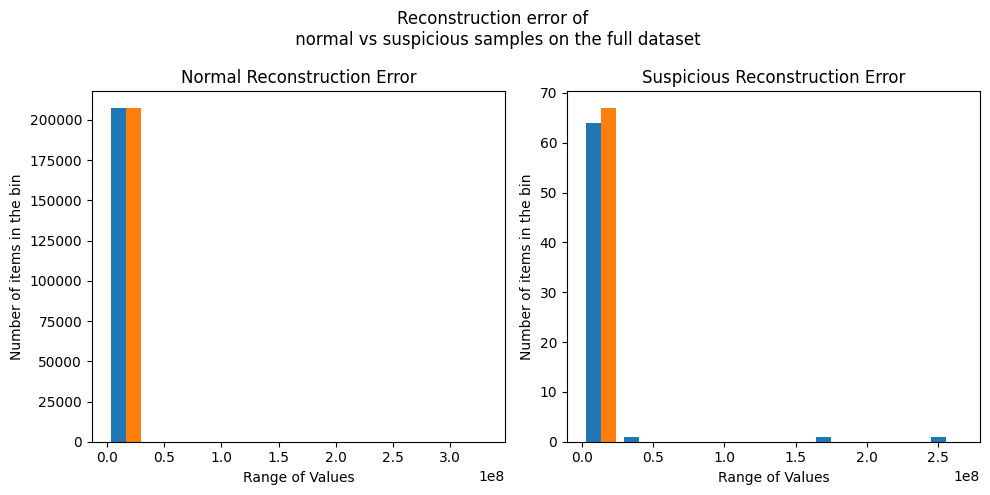

In [52]:
# Plot histograms of the normal and suspicious reconstruction error
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

plt.suptitle('Reconstruction error of \n normal vs suspicious samples on the full dataset')
ax[0].hist(df_normal_reconstructed, bins=10)
ax[0].set_title('Normal Reconstruction Error')
ax[0].set_xlabel('Range of Values')
ax[0].set_ylabel('Number of items in the bin')

ax[1].hist(df_suspicious_reconstructed, bins=10)
ax[1].set_title('Suspicious Reconstruction Error')
ax[1].set_xlabel('Range of Values')
ax[1].set_ylabel('Number of items in the bin')
plt.tight_layout()

plt.show()

In [53]:
# Defining a reconstruction error threshold that can help us discriminate between normal and suspicious activity
# Keep in mind, your domain knowledge comes heavily into play here.
# Set the threshold too low and you get a number of false positives
# Set the threshold too high and you get false negatives
# This is a game of give and take. 
# What are you willing to give and what are you willing to take?
# My recommendation,be ready to accept false positives rather than false negatives
# Mine is set to one standard deviation above the mean
threshold = df_normal_reconstructed.errors_mae.mean() + df_normal_reconstructed.errors_mae.std()
threshold

2400600.5

In [54]:
# We've done a lot so far. But how is the model performing

# Get the reconstruction error of the entire dataset
reconstruction_error = autoencoder.predict(df_conn.drop(columns=['label'], inplace=False))

# Get the loss
reconstruction_loss = tf.keras.losses.mae(y_true=df_conn.drop(columns=['label'], inplace=False), \
                                          y_pred=reconstruction_error )

# Calculate if the values in our reconstruction loss is less than our threshold
# https://www.tensorflow.org/api_docs/python/tf/math/less
loss_less_threshold = tf.math.less(x=reconstruction_loss, y=threshold, name='loss_less_threshold')
loss_less_threshold

6488/6488 [==============================] - 11s 2ms/step


<tf.Tensor: shape=(207608,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

In [55]:
# Get the shape of the two arrays
df_conn.drop(columns=['label'], inplace=False).shape, df_normal_labels.shape, loss_less_threshold.numpy()

((207608, 7),
 (207541,),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [56]:
# How did our model do for training
# import some metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, \
    precision_recall_curve, auc, classification_report, roc_curve

In [57]:
# Get the accuracy score. 
# Keep in mind, the problem we are solving here is not a classification problem
# Note these values are terrible. However, this is of little to no concern to me at this time
# Why? Because this is for learning purpose, not prediction
# Besides, "All models are wrong, some are useful"
# https://en.wikipedia.org/wiki/All_models_are_wrong
# Maybe along the way we will find an algorithm that allows us to build a useful model
accuracy_score(y_true=df_errors.label, y_pred=loss_less_threshold)

0.0007706832106662557

In [58]:
# Get the True and false positive rate along with the threshold
# https://venelinvalkov.medium.com/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
false_positive_rate, true_positive_rate, thresholds =  roc_curve(y_true=df_errors.label, 
                                                                 y_score=df_errors.errors_mae)

# Get the Area Under the Curve (AUC) Score
auc(false_positive_rate, true_positive_rate)

0.9827176748460491

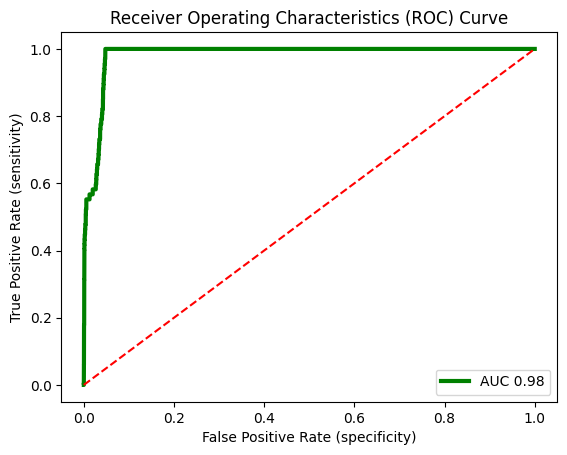

In [59]:
# Plot the Receiver Operating Characteristics (ROC) Curve
# Ths shows the true vs false positive rate across different thresholds values
# This curve does look good as it is further to the top left. 
# This is actually the type of ROC curve you want to see
# Keep in mind this is "mostly" used with binary classification. 
# This is not a binary classification problem but the ROC is being used to understand our model, not to "classify" the data
# https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.plot(false_positive_rate, true_positive_rate, lw=3, label=f'AUC {round(auc(false_positive_rate, true_positive_rate), 2)}', c='g')
plt.plot([0,1], ls='--', c='r')
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlabel('False Positive Rate (specificity)')
plt.legend(loc='best')
plt.show()

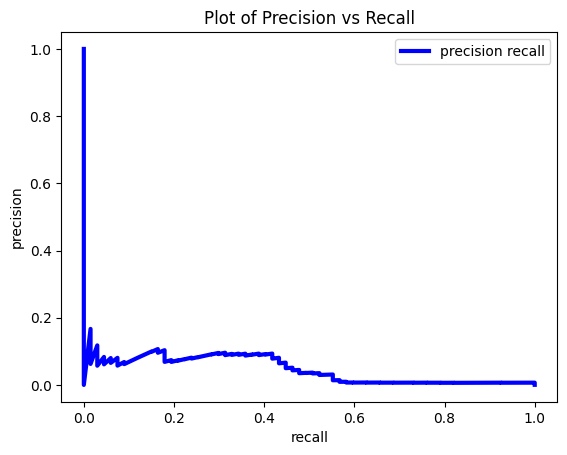

In [60]:
# Plot a precision recall curve
precison, recall, thresh = precision_recall_curve(df_errors.label, df_errors.errors_mae)
plt.title('Plot of Precision vs Recall')
plt.plot(recall, precison, 'b', lw=3, label='precision recall')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()

Text(0, 0.5, 'Precision')

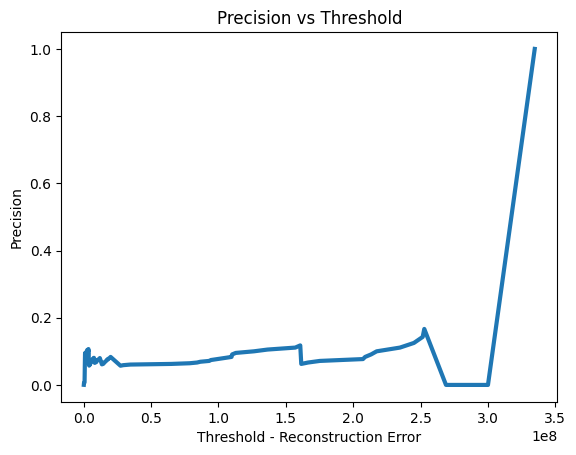

In [61]:
# Plot the precision vs thresholds
# Looks like once the reconstruction error goes to over 
plt.title('Precision vs Threshold')
plt.plot(thresh, precison[1:], lw=3, label='precision vs threshold')
plt.xlabel('Threshold - Reconstruction Error')
plt.ylabel('Precision')

In [62]:
# As the reconstruction error goes over 3e8, then is when the precision is the highest
# Finding those records where the reconstruction error is greater than 3e8 or 300000000.0
df_errors[df_errors.errors_mae > 3e8]

,errors_mae,label
3593245,300095040.00,0
3593400,334820192.00,0


Text(0, 0.5, 'Recall')

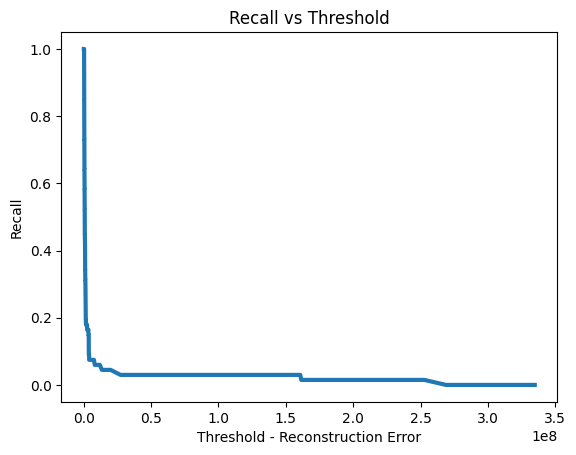

In [63]:
# only two records :-(

# Plot the recall vs thresholds
# Looks like once the reconstruction error goes to over 
plt.title('Recall vs Threshold')
plt.plot(thresh, recall[1:], lw=3, label='Recall vs threshold')
plt.xlabel('Threshold - Reconstruction Error')
plt.ylabel('Recall')

In [64]:
# As the threshold increases, the recall becomes lower. 
# This is obviously the opposite of what was seen above with the precision vs threshold

In [65]:
# Get the precision
precision_score(y_true=df_errors.label, y_pred=loss_less_threshold)

0.0002698886227487192

In [66]:
# import seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

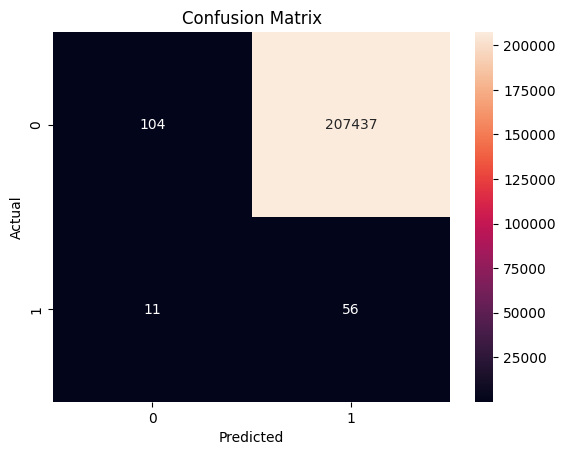

In [67]:
# Looking at the confusion matrix, clearly this model has way too much false positives
# Maybe we can do a better job at setting a different threshold
# However, as said above, we are here for learning purposes
# Most importantly, we are not attempting to solve a classification problem
# Neither are we looking to put this model in production
# This is being used for anomaly detection
# Thus the confusion matrix is just to give us insights into what our threshold looks like at present
sns.heatmap(confusion_matrix(y_true=df_errors.label, y_pred=loss_less_threshold), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# Imagine working in a SOC and you have to deal with all these false positives. 
# My gosh, this would make our job so much harder.

# If you wish to understand these metrics more, see
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics

# Thankfully this is not a classification problem we are trying to solve. 
# If it was, these outputs are really ... well want for a better word ... terrible
print(classification_report(y_true=df_errors.label, y_pred=loss_less_threshold))

              precision    recall  f1-score   support

           0       0.90      0.00      0.00    207541
           1       0.00      0.84      0.00        67

    accuracy                           0.00    207608
   macro avg       0.45      0.42      0.00    207608
weighted avg       0.90      0.00      0.00    207608



In [69]:
# With the threshold define, let's say a record comes in with the following values
# Let's define a sample with the features values: 
# duration	orig_bytes	resp_bytes	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes
new_sample = np.array([141., 356138566,	11037090, 60, 3026679, 33, 982584], dtype=float, ndmin=2)
new_sample

array([[1.41000000e+02, 3.56138566e+08, 1.10370900e+07, 6.00000000e+01,
        3.02667900e+06, 3.30000000e+01, 9.82584000e+05]])

In [70]:
# Make a prediction on the sample
# Remember, we need to pass the data through the similar process we did for training
# Hence, this data is being transformed
new_prediction = tf.keras.losses.mae(y_true=new_sample, 
                                     y_pred=autoencoder.predict(min_max_scaler.transform(new_sample))).numpy()
new_prediction

1/1 [==============================] - 0s 96ms/step


array([53026452.], dtype=float32)

In [71]:
# Import datetime library
from datetime import datetime

In [72]:
# Write some code to trigger an alert when a sample's reconstruction error passes our threshold
f'{datetime.now()} - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log entry Threshold Exceeded' if \
    new_prediction > threshold  else "[**] Normal Traffic"

'2023-05-28 16:57:03.270097 - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log entry Threshold Exceeded'

In [73]:
# As always, before, we go, let's save the model
# With the machine learning models, joblib was used
# In this case, I leverage Keras built in utilities for saving models
#   https://www.tensorflow.org/guide/keras/save_and_serialize
tf.keras.models.save_model(model=autoencoder, filepath='./SAVED_MODELS/TF_AUTOENCODER/tf_autoencoder.tf', \
                           overwrite=True, save_format='tf')

INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_AUTOENCODER/tf_autoencoder.tf\assets


INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_AUTOENCODER/tf_autoencoder.tf\assets


In [74]:
# With the model saved, time to load it
loaded_autoencoder = tf.keras.models.load_model(filepath='./SAVED_MODELS/TF_AUTOENCODER/tf_autoencoder.tf')
loaded_autoencoder

In [75]:
# Make a prediction with the loaded model
loaded_prediction_mae = tf.keras.losses.mae(y_true=new_sample, 
                                     y_pred=loaded_autoencoder.predict(min_max_scaler.transform(new_sample))).numpy()

f'{datetime.now()} - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log entry Threshold Exceeded' if loaded_prediction_mae > threshold  else "[**] Normal Traffic"

1/1 [==============================] - 0s 162ms/step


'2023-05-28 16:57:17.993772 - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log entry Threshold Exceeded'

In [76]:
# With everything done so far, let's go ahead and store our scaler.
# Remember, all preprocessing done on training data, MUST be done on testing, validation or any future data
# Import the library save the scaler
import pickle

In [77]:
# Dump the scaler to disk
#   https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/
#   https://stackabuse.com/bytes/how-to-save-and-load-fit-scikit-learn-scalers/
pickle.dump(obj=min_max_scaler, file=open('tf_min_max_scaler.pkl', mode='wb'))

Additional References and good reads: <br>
https://www.tensorflow.org/tutorials/generative/autoencoder <br>
https://www.youtube.com/watch?v=2K3ScZp1dXQ <br>
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9684419 <br>
https://www.mdpi.com/1424-8220/21/13/4294 <br>
https://ieeexplore.ieee.org/document/9647639 <br>
https://www.deeplearningbook.org/contents/autoencoders.html <br>
https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf <br>
https://www.youtube.com/watch?v=vfnxKO2rMq4 <br>
https://www.youtube.com/watch?v=wqhZaWR-J94 <br>
https://www.youtube.com/watch?v=q222maQaPYo <br>


https://learnopencv.com/autoencoder-in-tensorflow-2-beginners-guide/ <br>
https://anomagram.fastforwardlabs.com/#/ <br>
https://www.mdpi.com/1424-8220/21/19/6679 <br>
https://learnopencv.com/autoencoder-in-tensorflow-2-beginners-guide/ <br>
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.459.3788&rep=rep1&type=pdf  <br>
https://www.youtube.com/watch?v=FzS3tMl4Nsc <br>
https://www.youtube.com/watch?v=xTU79Zs4XKY <br>


